# Week 4: Homework 1 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

Estudiante: Iker Arana

----------------------------------------------------

The goal of this practice is to analyze the performance of different estimators on the Diabetes problem and we will analyze, by means of different approximations, which input features are more relevant to solve this problem. 

Note that previous week we already worked on Diabetes database, but we only used one of the input variable (BMI) to construct the regression model; in this practice we will use all the input features jointly.

To solve these notebook, complete the following sections implementing the solution that you consider most appropriate and showing the results that you find most interesting. For the evaluation of this notebook,  we will take into account the methodology used, the solution adopted, the presentation of the results and the conclusions obtained at the light of the results.


## 1. Data loading and preprocessing

Following the ML pipeline, start loading the data, creating the partitions that you consider necessary and carrying out the preprocessing that yu need.

Keep in mind that there is no single valid solution, and different reasons can lead you to make different data partitions or apply different normalizations. So **please justify the steps you are taking**.

In [0]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

(442, 10)
Numero de muestras: 442


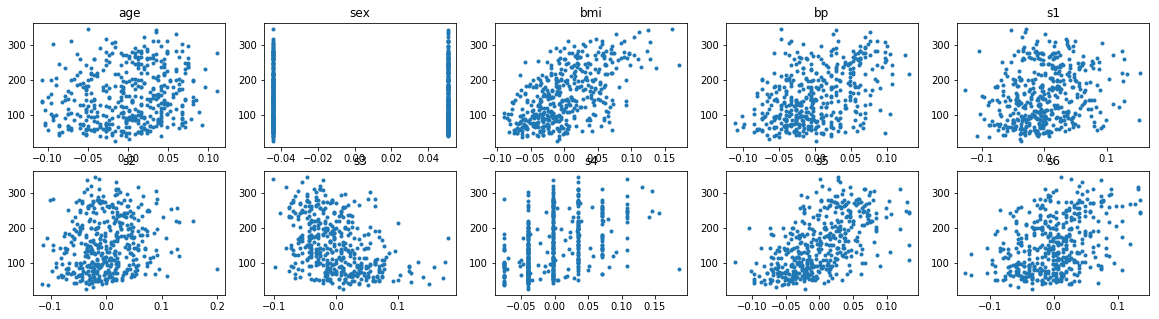

In [28]:
## 1. Data loading and preprocessing

# Include your code here (create as many cells as you need)

# caragamos los datos
diabetes = load_diabetes()

# cargamos las caracterisitcas
X = diabetes.data
#print(X)
print(X.shape) # 10 caracteristicas por 442 evidencias. Matriz 442x10


# cargamos los datos de salida
Y = diabetes.target

# cargamos los nombres de las caracteristicas
feature_names = diabetes.feature_names

# pintamos el numero de evidencias que hay en los datos
print('Numero de muestras: %s' %X.shape[0])

D = X.shape[1] # cogemos la segunda posicion de la dimension de la matriz 442

plt.figure( figsize=(20,5))

for d in range (D):
  plt.subplot(2,5,d+1)
  plt.plot(X[:,d],Y,'.',)
  plt.title(feature_names[d])



## 2. Performance evaluation 

Now, analyze the performance of different estimators to predict the diabetes progression from all the available features. 

As possible estimators to be included in this study, we will consider those studied so far: K-NN, linear regressor, polynomial regressor and their regularized versions. Please, in case these methods have any free hiperparameter, **clearly justify** the selection of their optimal values.

As you know, for the performance evaluation, we have seen several metrics. So, here, you can use one or several of them. But, regardless of the used metric, don't forget to include a final analysis comparing the performance of different methods and trying to justify the obtained results.

### 2.1 EVALUACION DE LOS DIFERENTES MODELOS

Se usaran los 3 diferentes modelos que hemos visto a lo largo de la asignatura


1.   KNN
2.   Regresion lineal
3. Regresion Polinomica



In [29]:
# GENERAMOS LA PARTICION DE LOS DATOS

# 30% test, 70% entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# pintamos las dimensiones
print('\nDatos de entrenamiento X: \n ', X_train.shape)
print('\nDatos de testeo X: \n ', X_test.shape)
print('\nDatos de entrenamiento Y: \n ', Y_train.shape)
print('\nDatos de testeo Y: \n ', Y_test.shape)

# Analyze mean and std of each feature
print('\nMedia datos de entrenamiento: ',np.mean(X_train, axis=0))
print('\nVarianza datos de entrenamiento: ',np.std(X_train, axis=0))

# Aun estando normalizados los datos, los normalizamos. Solo normalizamos los datos de entrenamiento
transformer = StandardScaler().fit(X_train)  # ajustamos el objeto StandarScaler con la media y la varianza
X_train_norm = transformer.transform(X_train) # normalizamos
X_test_norm =  transformer.transform(X_test)

# chequeamos despues de normalizar
print('\nMedia datos de entrenamiento despues de normalizar: ',np.mean(X_train_norm, axis=0))
print('\nVarianza datos de entrenamiento despues de normalizar : ',np.std(X_train_norm, axis=0))


Datos de entrenamiento X: 
  (309, 10)

Datos de testeo X: 
  (133, 10)

Datos de entrenamiento Y: 
  (309,)

Datos de testeo Y: 
  (133,)

Media datos de entrenamiento:  [-0.00068293  0.00101409 -0.00129825 -0.00011076 -0.00019301 -0.00046919
  0.00051073  0.0003037  -0.00084528 -0.00078279]

Varianza datos de entrenamiento:  [0.04829566 0.04761868 0.04828952 0.04766982 0.04737831 0.04758956
 0.04821587 0.04890978 0.04909351 0.05103602]

Media datos de entrenamiento despues de normalizar:  [-5.74872764e-18  5.31757306e-16  2.01205467e-17 -2.34440299e-17
  2.87436382e-18  3.71870819e-17 -5.28164352e-17  4.63491166e-17
 -2.29949105e-17 -2.15577286e-18]

Varianza datos de entrenamiento despues de normalizar :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 2.1.1 K-Nearest Neighbours
El modelo KNN es un modelo **No parametrico** ya que no usa parametros para aprender.

Para estimar la salida debemos:


1. Recibir una nueva muestra $\mathbf{x}^*$   
2. Seleccionar un valor para el parametro $K$
3. Buscar en los datos de entrenamiento los $K$ valores mas cercanos a la muestra $\mathbf{x}^*$
4. Calcular el valor estimado como la media de la variable objetivo $y$ asociada a los vecinos

\begin{align}
f(\mathbf{x}^*) =\frac{1}{K}\sum_{k\in \mathcal{S}_{K}(\mathbf{x}^*)} y^{(k)},
\end{align}


Donde $S_{k}$ es el conjunto de $K$ puntos de entrenamiento mas cercanos a $\mathbf{x}^*$.

La distancia entre puntos de suele calcular con la **distancia euclideana**: 
\begin{align}
d(\mathbf{x}^{(i)},\mathbf{x}^*) = \left|\left|\mathbf{x}^{(i)}-\mathbf{x}^*\right|\right|^2
\end{align}



 Valor minimo MSE test: 
3050.171004680067 
 Indice del valor minimo: 
 27

 Valor maximo MSE test: 
7413.609022556391 
 Indice del valor maximo: 
 0


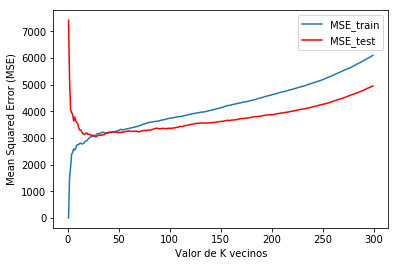

In [30]:
## KNN
from sklearn.neighbors import KNeighborsRegressor

MSE_K_train = []
MSE_K_test = []
K_values = range(1,300)
for K in K_values:
  neigh = KNeighborsRegressor(n_neighbors=K)
  neigh.fit(X_train, Y_train) 

  f_train=neigh.predict(X_train)
  MSE_K_train.append(np.mean((Y_train-f_train)**2))

  f_test=neigh.predict(X_test)
  MSE_K_test.append(np.mean((Y_test-f_test)**2))


print("\n Valor minimo MSE test: \n"+ str(min(MSE_K_test)) +" \n Indice del valor minimo: \n "+str(MSE_K_test.index(min(MSE_K_test))))
print("\n Valor maximo MSE test: \n"+str(max(MSE_K_test)) +" \n Indice del valor maximo: \n "+str(MSE_K_test.index(max(MSE_K_test))))


  
plt.figure()
plt.plot(K_values,MSE_K_train,label='MSE_train')
plt.plot(K_values,MSE_K_test,'r',label='MSE_test')
plt.xlabel('Valor de K vecinos')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


Analizando la curva de test, vemos que el error se minimiza para $K=27$ vecinos. El $MSE$ tiene un valor igual a 3050.171004680067  



##### 2.1.1.1 K-Folds Cross Validation
Utilizamos este modelo, para seleccionar el valor de $K$ que minimiza el MSE.

Para ello, sobre el conjunto de datos de entrenamiento, tenemos que generar otra particion, con un conjunto de datos de validacion

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/validation_set.png" width="70%" >

Con ello, generaremos un modelo nuevo por cada valor de $K$ y computaremos su $MSE$ segun la siguiente expresion:


$$MSE_{val}(K) = \frac{1}{N_{val}} \sum_{i=1}^{N_{val}} \left(y^{(i)}-{f_K}({\bf x}^{(i)})\right)^2$$

Despues seleccionaremos el valor de $K$ que minimiza el $MSE$ y reentrenaremos e modelo

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Parametros
# usaremos valores de K desde 1 hasta 50
K_max = 70
rang_K = np.arange(1, K_max+1)
nfold = 10

# diccinario donde guardaremos los parametros en funcion del valor de K
tuned_parameters = [{'n_neighbors': rang_K}]

# Creamos el objeto
clf_base = KNeighborsRegressor( )

# creamos el objeto sobre el que realizaremos la bsuqueda del mejor estimador en funcion a los parametros que le hemos asignado
# el parametro scoring, define el sistema de reglas que vamos a usar para evaluar las predicciones en el conjunto de datos de entrenamiento
# en este caso usaremos 'neg_mean_squared_error' --> 
# bajo la premisa de que , con la premisa de que los valores mayores son mejores que los valores menores 
#as metricsas que miden la distancia entre el modelo y los datos, como el mean_swuared_error
# devuelve el valor en negativo
clf = GridSearchCV(clf_base, tuned_parameters, cv=nfold, iid= False, scoring='neg_mean_squared_error')

# Ejecutamos el CV para ajustarlo
clf.fit(X_train, Y_train)





GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid=False, n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

### Analisis de Resultados para el CV


Resultados CV:
For K = 1, validation neg-MSE is -6068.81 (+/-967.437)%
For K = 2, validation neg-MSE is -4385.77 (+/-672.941)%
For K = 3, validation neg-MSE is -3985.99 (+/-534.359)%
For K = 4, validation neg-MSE is -3690.64 (+/-603.898)%
For K = 5, validation neg-MSE is -3501.85 (+/-541.263)%
For K = 6, validation neg-MSE is -3405.66 (+/-501.683)%
For K = 7, validation neg-MSE is -3381.25 (+/-458.872)%
For K = 8, validation neg-MSE is -3303.00 (+/-425.378)%
For K = 9, validation neg-MSE is -3328.31 (+/-438.796)%
For K = 10, validation neg-MSE is -3343.55 (+/-427.596)%
For K = 11, validation neg-MSE is -3203.65 (+/-414.765)%
For K = 12, validation neg-MSE is -3156.01 (+/-434.699)%
For K = 13, validation neg-MSE is -3168.25 (+/-403.887)%
For K = 14, validation neg-MSE is -3194.54 (+/-381.716)%
For K = 15, validation neg-MSE is -3211.71 (+/-377.744)%
For K = 16, validation neg-MSE is -3236.31 (+/-380.826)%
For K = 17, validation neg-MSE is -3254.14 (+/-384.140)%
For K = 18, validation ne

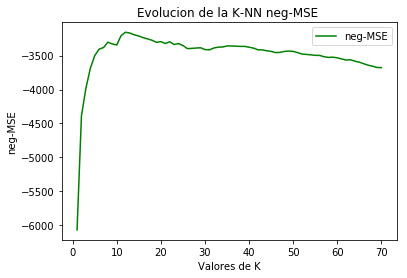

In [32]:
print("Resultados CV:")

# recogemos los diferentes parametros de validacion 
paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']

# pintamos los datos 
for i, K in enumerate(rang_K):
    params = paramsFolds[i]
    mean_score = meanScoreFolds[i]
    std_score = stdScoreFolds[i]
    print("For K = %d, validation neg-MSE is %2.2f (+/-%1.3f)%%" 
          % (params['n_neighbors'], mean_score, std_score / 2))

# guardamos los valores medios del test
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(rang_K,vect_val,'g', label='neg-MSE')
plt.legend()
plt.xlabel('Valores de K')
plt.ylabel('neg-MSE')
plt.title('Evolucion de la K-NN neg-MSE ')
plt.show()

In [33]:
# ASignamos el valor optimo de K que nos devuele el modelo
K_opt = clf.best_params_['n_neighbors']
print("EL valor optimo de K es de K=%d" %(K_opt))

# Seleccionamos el estimador final y calculamos su MSE
f_test = clf.best_estimator_.predict(X_test)
MSE_test = np.mean((Y_test-f_test)**2) 
print("La precison de la funcion de error MSE es de MSE=%2.2f" %(MSE_test ))

EL valor optimo de K es de K=12
La precison de la funcion de error MSE es de MSE=3294.70


### Diferentes Metricas

Finalmente vamos a hacer una comparativa en funcion a las diferentes funciones de evaluacion que nos ofrece SkLearn. Usaremos las siguientes:
* Mean Square Error (MSE)
$$MSE = \frac{1}{N} \sum_{i=1}^{N} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2$$

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{N} \sum_{i=1}^{N} \left|y^{(i)}-f({\bf x}^{(i)})\right|$$

* R2-score (R2)
$$R2 =  1- \frac{ \sum_{i=1}^{N} \left(y^{(i)}-f({\bf x}^{(i)})\right)^2}{\sum_{i=1}^{N} \left(y^{(i)}-\bar{y}\right)^2}$$

In [42]:
from sklearn import metrics
from sklearn import neighbors

# Retrain the KNN model and compute the test output
## (this is not neeeded since it is already done in the previous cell)
clf = neighbors.KNeighborsRegressor(K_opt)
clf.fit(X_train, Y_train)
f_test = clf.predict(X_test)

# Compute the performance metrics
MAE = metrics.mean_absolute_error(Y_test, f_test) 
MSE = metrics.mean_squared_error(Y_test, f_test) 
R2score = metrics.r2_score(Y_test, f_test) 

print("Los valores del test de evaluacion para las diferentes metricas son: ")
print("\n MAE="+str(MAE))
print("\n MSE="+str(MSE))
print("\n R2score="+str(R2score))

Los valores del test de evaluacion para las diferentes metricas son: 

 MAE=46.21929824561403

 MSE=3294.695279866333

 R2score=0.35417018305023074


#### 2.1.2 REGRESION LINEAL

In [0]:
## LINEAR REGRESION

#### 2.1.3 REGRESION POLINOMICA

In [0]:
## POLYNOMIAL REGRESION

# 2.2 VERSIONES REGULARIZADAS
Se usaran las 3 diferentes versiones que hemos visto en la asignatura 


1.   L2
2.   L1
3.   Lasso


In [0]:
## L2

##

In [0]:
## L1

In [0]:
## LASSO

## 3. Study of feature relevance and feature selection

In this last section, using different criteria, you have to analyze the relevance of the input features. Thus, you will have to find a subset with the $D'$ most relevant features and, using this subset of features, analyze the final performance of a regressor (for the sake of simplicity, consider a linear ridge regressor as final regressor).

To analyze the feature importances or relevances, you can use the following criteria:

1. **Relevance ranking based on the validation error**: if there were $D$ input features, we could try to train $D$ regressors where each regressor uses one (and only one) different input feature. According to the final perfomance of each regressor (evaluated on a validation set or with a CV proccess), we could rank the features (the most relevant feature is the one providing the lowest error). Using this ranking, we can select the $D'$ most relevant features as the $D'$ top-ranked ones. Note that this scheme only analyzes the isolated relevance of each feature to predict the output; so, it is said that this approach is *univariate*.

 <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/FeatureRanking.png" width="90%" > 


2. **Greedy search based on the validation error**: approach (1) has the disadvantage of not taking into account relationships between features. For instance, method (1) would not realize that two features can be rendundant or that a feature, that is useless by itself, can be very useful combined with another feature. To overcome this drawback, we should have to analyze subsets of features; however, exploring all possible subsets  is usually computationally unflexible (there are $2^D$ combinations!!!!); so a greedy search (fordward or backward) is usually prefered:

  2.1 *Fordward search*: It starts with an empty set and, iteratively, adds new features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Forward_search.png" width="48%" > 

  2.2 *Backward search*: It starts considering all the features and, iteratively, removes features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Backward_search.png" width="48%" > 

3. **Ridge linear regression with a prunning**: We know that the L2 regularization limits the magnitude of the weight vector to avoid overfitting problems, but these weigths do not become to null. However, in a linear model, *the weight magnitude can be an indicative of the feature relevance* and, unlike approach (1), all features are analyzed at the same time (*multivariate approach*). Use the weigth magnitude to generate a ranking of features and, later, use this ranking to select the $D'$ most relevant features.

4. **Lasso linear regression**: In this case, the L1 penalty allows us to directly eliminate some of the input features. Explore different values of the regularization parameter $\lambda$ to get a sequence of selected feature sets (from a single feature to all features).


5. **Elastic-net linear regression**: This last approach combines L1 and L2 regularizations, thus including the advantages of both methods. Varying adequately their regularization parameters, create a sequence of feature selection subsets. 



Final comments:

* Due to part of the feature selection process involves selecting the optimum number of features, to avoid additional complexity (having to validate this number), you can analyze the different methods by exploring the curves of MSE vs. number of selected features ($D'$).

* It is not necessary to apply all these methods to complete this notebook (you can choose, at least, three of them). In fact, the implementation of greedy search approaches require an advanced knowledge of Python; so take this into account when you design your notebook solution.

* **Please, analyze in detail the different results, pointing out the advantages/disadvantages of each feature selection scheme**. Think about the behaviour of the different criteria in cases where a feature is irrelevant or there are redundant features. Additional experiments helping you to support any of your conclusions will be welcome.

In [0]:
## 3. Feature selection 

# Include your code here (create as many cells as you need)